<a href="https://colab.research.google.com/github/hagijakobson/brazilian-congressmen-spendings/blob/main/1_data_wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brazilian congressmen spendings - Data Wrangling #1


## 1. Import libraries

In [23]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Load dataset

For read this file properly is necessary change the default enconding to "latin_1", the seperator to ";" and skip the first row "skiprows=1".

In [2]:
file_path = "https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2019.csv"
dataset_original = pd.read_csv(file_path, encoding="latin_1", sep=';', skiprows=1)
dataset = dataset_original.copy()
dataset.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2019,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,006582758,04/01/2019,Despesa com pagamento de energia elétrica do e...,"66,02",2116543
1,2019,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,006582755,04/01/2019,Despesa com pagamento de energia elétrica do e...,"139,98",2116546
2,2019,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,00119,07/01/2019,Despesa com pagamento de aluguel de imóvel par...,6000,2113817
3,2019,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.423.963/0001-11,OI MÓVEL S.A.,86161151,25/12/2018,Despesa com pagamento de telefonia para o escr...,"316,39",2116541
4,2019,2,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,007236036,04/02/2019,Despesa com pagamento de energia elétrica para...,"99,45",2116550


## 3. Data Wrangling

### 3.1 Basic info

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21634 entries, 0 to 21633
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ANO                21634 non-null  int64 
 1   MES                21634 non-null  int64 
 2   SENADOR            21634 non-null  object
 3   TIPO_DESPESA       21634 non-null  object
 4   CNPJ_CPF           21634 non-null  object
 5   FORNECEDOR         21634 non-null  object
 6   DOCUMENTO          20900 non-null  object
 7   DATA               21634 non-null  object
 8   DETALHAMENTO       13092 non-null  object
 9   VALOR_REEMBOLSADO  21634 non-null  object
 10  COD_DOCUMENTO      21634 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 1.8+ MB


### 3.2 Handling Missing Values

In [4]:
# get the number of missing data points per column
missing_values_count = dataset.isnull().sum()
missing_values_count

ANO                     0
MES                     0
SENADOR                 0
TIPO_DESPESA            0
CNPJ_CPF                0
FORNECEDOR              0
DOCUMENTO             734
DATA                    0
DETALHAMENTO         8542
VALOR_REEMBOLSADO       0
COD_DOCUMENTO           0
dtype: int64

Dada a natureza das colunas "DOCUMENTO" e "DETALHAMENTO" não farei imputação de dados, pois a própria ausência de valores para essas colunas já é uma informação importante que será explorada mais adiante.

In [5]:
# how many total missing values do we have?
total_cells = np.product(dataset.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

3.897904813130846


In [6]:
dataset[dataset.isnull().any(axis=1)].head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
193,2019,3,ALESSANDRO VIEIRA,"Locomoção, hospedagem, alimentação, combustíve...",07.424.109/0001-03,SINTAXI DF,NaN,22/03/2019,Aquisição de serviço de taxi para locomoção do...,55,2117664
230,2019,5,ALESSANDRO VIEIRA,"Contratação de consultorias, assessorias, pesq...",29.419.841/0001-10,INOVAÇÕES VISUAIS MDLUX,00000014,08/05/2019,NaN,380,2126193
465,2019,12,ALESSANDRO VIEIRA,"Locomoção, hospedagem, alimentação, combustíve...",10.898.850/0001-02,RSA COMERCIO DE ALIMENTOS LTDA ME,55138,16/12/2019,NaN,"11,24",2137809
470,2019,12,ALESSANDRO VIEIRA,"Locomoção, hospedagem, alimentação, combustíve...",33.469.172/0022-92,SENAC,26458,17/12/2019,NaN,"16,89",2137813
479,2019,1,ALOYSIO NUNES FERREIRA,"Aluguel de imóveis para escritório político, c...",011.763.248-10,JOSUÉ DIMAS DE MELO PIMENTA,NaN,31/01/2019,DESPESA COM ALUGUEL DAS INSTALAÇÕES DO ESCRITÓ...,6766,2113795


### 3.3 Parsing dates

In [7]:
dataset['DATA']

0        04/01/2019
1        04/01/2019
2        07/01/2019
3        25/12/2018
4        04/02/2019
            ...    
21629    19/01/2019
21630    24/01/2019
21631    29/01/2019
21632    23/01/2019
21633    26/01/2019
Name: DATA, Length: 21634, dtype: object

In [8]:
dataset['DATA_parsed'] = pd.to_datetime(dataset['DATA'], format="%d/%m/%Y", errors = 'coerce')
dataset['DATA_parsed']

0       2019-01-04
1       2019-01-04
2       2019-01-07
3       2018-12-25
4       2019-02-04
           ...    
21629   2019-01-19
21630   2019-01-24
21631   2019-01-29
21632   2019-01-23
21633   2019-01-26
Name: DATA_parsed, Length: 21634, dtype: datetime64[ns]

In [9]:
dataset.loc[pd.isna(dataset['DATA_parsed']),:]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO,DATA_parsed
10986,2019,1,LÚCIA VÂNIA,"Aluguel de imóveis para escritório político, c...",08.573.731/0001-38,LDE Contabilidade e Administração de Condomíni...,0107007,31/01/0219,Taxa condominial,"271,26",2114251,NaT


Acima vê-se que houve um erro de digitação na data em questão, sendo assim segue-se a correção.

In [10]:
dataset.loc[10986,'DATA'] = '31/01/2019'

In [11]:
dataset.loc[pd.isna(dataset['DATA_parsed']),:]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO,DATA_parsed
10986,2019,1,LÚCIA VÂNIA,"Aluguel de imóveis para escritório político, c...",08.573.731/0001-38,LDE Contabilidade e Administração de Condomíni...,0107007,31/01/2019,Taxa condominial,"271,26",2114251,NaT


In [12]:
dataset['DATA_parsed'] = pd.to_datetime(dataset['DATA'], format="%d/%m/%Y")
dataset['DATA_parsed']

0       2019-01-04
1       2019-01-04
2       2019-01-07
3       2018-12-25
4       2019-02-04
           ...    
21629   2019-01-19
21630   2019-01-24
21631   2019-01-29
21632   2019-01-23
21633   2019-01-26
Name: DATA_parsed, Length: 21634, dtype: datetime64[ns]

In [13]:
dataset['DATA_parsed'].isnull().sum()

0

In [14]:
dataset.loc[10986,:]

ANO                                                               2019
MES                                                                  1
SENADOR                                                    LÚCIA VÂNIA
TIPO_DESPESA         Aluguel de imóveis para escritório político, c...
CNPJ_CPF                                            08.573.731/0001-38
FORNECEDOR           LDE Contabilidade e Administração de Condomíni...
DOCUMENTO                                                      0107007
DATA                                                        31/01/2019
DETALHAMENTO                                          Taxa condominial
VALOR_REEMBOLSADO                                               271,26
COD_DOCUMENTO                                                  2114251
DATA_parsed                                        2019-01-31 00:00:00
Name: 10986, dtype: object

In [16]:
del dataset['DATA']

In [17]:
dataset.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO,DATA_parsed
0,2019,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,006582758,Despesa com pagamento de energia elétrica do e...,"66,02",2116543,2019-01-04
1,2019,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,006582755,Despesa com pagamento de energia elétrica do e...,"139,98",2116546,2019-01-04
2,2019,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,00119,Despesa com pagamento de aluguel de imóvel par...,6000,2113817,2019-01-07
3,2019,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.423.963/0001-11,OI MÓVEL S.A.,86161151,Despesa com pagamento de telefonia para o escr...,"316,39",2116541,2018-12-25
4,2019,2,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,007236036,Despesa com pagamento de energia elétrica para...,"99,45",2116550,2019-02-04


####  3.3.1 Plot the day of the month to check the date parsing

One of the biggest dangers in parsing dates is mixing up the months and days. The to_datetime() function does have very helpful error messages, but it doesn't hurt to double-check that the days of the month we've extracted make sense.

To do this, let's plot a histogram of the days of the month. We expect it to have values between 1 and 31 and, since there's no reason to suppose the spendings are more common on some days of the month than others, a relatively even distribution. (With a dip on 31 because not all months have 31 days.) Let's see if that's the case:

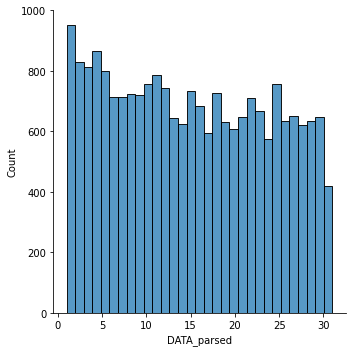

In [24]:
sns.displot(dataset['DATA_parsed'].dt.day, kde=False, bins=31)
plt.show()

Aparentemente existe um gasto maior no primeiro dia do mês, mas de maneira geral não parece que houve merge de dias e meses durante o parsing date.

### 3.4 Inconsistent Data Entry